In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math
from matplotlib.ticker import ScalarFormatter
from scipy import stats

#plt.rcParams["figure.figsize"] = (15,10)

In [2]:
muminus_500k = uproot.open("500k_muminus.root")
pilot_90_97 = uproot.open("plate_90_97.root")
pilot_98_105 = uproot.open("plate_98_105.root")
pilot_106_113 = uproot.open("plate_106_113.root")
pilot_114_118 = uproot.open("plate_114_118.root")


In [3]:
# funtion to get any tree from MC simulation.
def tree_MC(N):
    index='tree'+ str(N)
    return muminus_500k[index]

In [4]:
# since we have split up the pilot data into sets of plates
# we want a way to access them all in one function, we'll use this
# to identify the plates in each groups
#def plate(N):
#    result = 0
#    if (N >= 90 and N < 98):
#        result = 1
#    elif (N >= 98 and N < 106):
#        result = 2
#    elif (N >= 106 and N < 114):
#        result = 3
#    elif(N >= 114 and N < 119):
#        result = 4
#    return result

In [5]:
# funtion to get any tree from pilot data. Note that for this data, 
# there are two tree for each plates. The lower number is 'a back 
# up copy of the meta data' according to this discussion post:
# https://root-forum.cern.ch/t/multiple-trees-with-the-same-name/20878
# update, not specifying takes the most recent/higher by default
# https://uproot.readthedocs.io/en/latest/uproot.reading.ReadOnlyDirectory.html?highlight=cycle
def tree_pilot_data(N):
    index = index='tree'+ str(N)
    if (N >= 90 and N < 98):
        return pilot_90_97[index]
    elif (N >= 98 and N < 106):
        return pilot_98_105[index]
    elif (N >= 106 and N < 114):
        return pilot_106_113[index]
    elif(N >= 114 and N < 119):
        return pilot_114_118[index]
    else:
        print('INVALID PLATE NUMBER')

In [6]:
def hists(branch,N):
    
    tree_mc = tree_MC(N)[branch].array()
    tree_pilot = tree_pilot_data(N)[branch].array()
    mean_mc = round(np.mean(tree_mc),7)
    mean_pilot = round(np.mean(tree_pilot),7)
    fig = plt.figure(figsize=(20,10))
    
    # mc simulation
    ax = fig.add_subplot(1,2,1)
    ax.hist(tree_mc,bins=100,label="mean: " + str(mean_mc))
    ax.set_xlabel(branch,size=15)
    ax.set_ylabel('count',size=15)
    ax.set_title(branch + ' distribution in MC simulation (tree' + str(N)+')' ,size=20)
    if (branch == 'tx' or branch == 'ty'):
        ax.set_xlim(-1,1)
    #if (branch == 'z'):
    #    ax.set_xlim(mean_mc-20, mean_mc+20)
    ax.legend(fontsize=15)
    
    # pilot run data
    ax = fig.add_subplot(122)
    ax.hist(tree_pilot,bins=100,label="mean: " + str(mean_pilot))
    ax.set_xlabel(branch,size=15)
    ax.set_ylabel('count',size=15)
    ax.set_title(branch + ' distribution in pilot run data (tree' + str(N)+')',size=20)
    if (branch == 'tx' or branch == 'ty'):
        ax.set_xlim(-1,1)
    ax.legend(fontsize=15)
    #if(branch == 'z'):
    #    ax.set_xlim(mean_pilot - 2, mean_pilot + 2)
    
    #file_name = branch+'/'+branch+'_tree'+str(N)+'.png'
    #plt.savefig(file_name,bbox_inches='tight',facecolor='w')
    plt.show()


In [7]:
np.unique(np.float64(muminus_500k["tree90"]["pdgid"].array()))

array([-3.11200000e+03, -2.21200000e+03, -3.21000000e+02, -2.11000000e+02,
       -1.30000000e+01, -1.10000000e+01,  1.10000000e+01,  1.30000000e+01,
        2.11000000e+02,  3.21000000e+02,  2.21200000e+03,  1.00001002e+09,
        1.00001003e+09,  1.00002004e+09])

In [8]:
data_test = np.float64(muminus_500k["tree118"]["pdgid"].array())

In [9]:
len(data_test)

542458

In [10]:
len(data_test[data_test[:] == 13])

286360

In [11]:
def scatter_txty(N):
    tree_mc_tx = tree_MC(N)['tx'].array()
    tree_mc_ty = tree_MC(N)['ty'].array()
    mean_mc_tx = round(np.mean(tree_mc_tx),7)
    mean_mc_ty = round(np.mean(tree_mc_ty),7)
    
    tree_pilot_tx = tree_pilot_data(N)['tx'].array()
    tree_pilot_ty = tree_pilot_data(N)['ty'].array()
    mean_pilot_tx = round(np.mean(tree_pilot_tx),7)
    mean_pilot_ty = round(np.mean(tree_pilot_ty),7)

    fig = plt.figure(figsize=(20,10))
    
    # mc simulation
    ax = fig.add_subplot(1,2,1)
    ax.scatter(tree_mc_tx,tree_mc_ty)
    ax.set_xlabel('txty',size=15)
    ax.set_ylabel('count',size=15)
    ax.set_title('tx-ty distribution in MC simulation (tree' + str(N)+')',size=20)
    #ax.legend(loc='center')
    ax.text(-1,0,'center: ('+str(round(mean_mc_tx,3))+', ' + str(round(mean_mc_ty,3))+')',size=20)

    
    # pilot run data
    ax = fig.add_subplot(122)
    ax.scatter(tree_pilot_tx,tree_pilot_ty)
    ax.set_xlabel('txty',size=15)
    ax.set_ylabel('count',size=15)
    ax.set_title('tx-ty distribution in pilot run data (tree' + str(N)+')',size=20)
    ax.text(-0.75,0,'center: ('+str(round(mean_pilot_tx,3))+', ' + str(round(mean_pilot_ty,3))+')',size=20)

    #plt.show()
    file_name = 'TXTY/txty_tree'+str(N)+'.png'
    plt.savefig(file_name,bbox_inches='tight',facecolor='w')

In [12]:
#for i in range(90,119):
#    scatter_txty(i)
    

In [13]:
def hists_x_y(branch,N):
    
    tree_mc = tree_MC(N)[branch].array()
    tree_pilot = tree_pilot_data(N)[branch].array()
    
    mc_min = np.min(tree_mc)
    mc_max = np.max(tree_mc)
    
    pilot_min = np.min(tree_pilot)
    pilot_max = np.max(tree_pilot)
    
    fig = plt.figure(figsize=(20,10))
    
    # mc simulation
    ax = fig.add_subplot(1,2,1)
    count, _, _ = ax.hist(tree_mc,bins=100)
    #ax.hist(tree_mc,bins=100)
    ax.set_xlabel(branch,size=15)
    ax.set_ylabel('count',size=15)
    ax.set_title(branch + ' distribution in MC simulation (tree' + str(N)+')' ,size=20)
    ax.text(np.mean(tree_mc) - 30,count.max()/3,branch + '-range: [' + str(np.min(tree_mc)) + ', ' +  str(np.max(tree_mc)) + ']' ,size=12)
    
    # pilot run data
    ax = fig.add_subplot(122)
    count, _, _ = ax.hist(tree_pilot,bins=100)
    ax.set_xlabel(branch,size=15)
    ax.set_ylabel('count',size=15)
    ax.set_title(branch + ' distribution in pilot run data (tree' + str(N)+')',size=20)
    ax.text(np.mean(tree_pilot) - 3000,count.max()/3,branch + '-range: [' + str(np.min(tree_pilot)) + ', ' +  str(np.max(tree_pilot)) + ']' ,size=12)

    
    file_name = branch+'/'+branch+'_tree'+str(N)+'.png'
    plt.savefig(file_name,bbox_inches='tight',facecolor='w')
    #plt.show()


In [14]:
#for i in range(90,119):
#    hists_x_y('y',i)

In [15]:
def get_area(N):
    tree_mc_x = tree_MC(N)['x'].array()
    tree_mc_y = tree_MC(N)['y'].array()
    mc_xmin = np.min(tree_mc_x)
    mc_xmax = np.max(tree_mc_x)
    mc_ymin = np.min(tree_mc_y)
    mc_ymax = np.max(tree_mc_y)
    mc_x_span = mc_xmax - mc_xmin
    mc_y_span = mc_ymax - mc_ymin
    area_mc = (mc_x_span)*(mc_y_span)
    mc = {'area': area_mc,'x_span': mc_x_span,'y_span': mc_y_span,'xmin': mc_xmin, 'xmax': mc_xmax,'ymin': mc_ymin,'ymax': mc_ymax}
    
    tree_pilot_x = tree_pilot_data(N)['x'].array()
    tree_pilot_y = tree_pilot_data(N)['y'].array()
    pilot_xmin = np.min(tree_pilot_x)
    pilot_xmax = np.max(tree_pilot_x)
    pilot_ymin = np.min(tree_pilot_y)
    pilot_ymax = np.max(tree_pilot_y)
    pilot_x_span = pilot_xmax - pilot_xmin
    pilot_y_span = pilot_ymax - pilot_ymin
    area_pilot = (pilot_x_span)*(pilot_y_span)
    pilot = {'area': area_pilot,'x_span': pilot_x_span,'y_span': pilot_y_span ,'xmin': pilot_xmin, 'xmax': pilot_xmax,'ymin': pilot_ymin,'ymax': mc_ymax}
    return[mc, pilot]

In [16]:
def scatter_xy(N):
    data = get_area(N)
    
    tree_mc_x = tree_MC(N)['x'].array()
    tree_mc_y = tree_MC(N)['y'].array()
    
    tree_pilot_x = tree_pilot_data(N)['x'].array()
    tree_pilot_y = tree_pilot_data(N)['y'].array()
    
    fig = plt.figure(figsize=(20,10))
    
    # mc simulation
    ax = fig.add_subplot(1,2,1)
    ax.scatter(tree_mc_x,tree_mc_y)
    #ax.hist(tree_mc,bins=100)
    ax.set_xlabel('x',size=15)
    ax.set_ylabel('y',size=15)
    ax.set_title('xy distribution in MC simulation (tree' + str(N)+')' ,size=20)
    ax.text(-35,0,'area:' + str(data[0]['x_span']) + '$*$' +  str(data[0]['y_span']) + '$=$ ' + str(data[0]['area']) + ' $(u^2)$' ,size=12)
    ax.text(-30,5,'[xmin,xmax]: [' + str(data[0]['xmin']) + ', ' +  str(data[0]['xmax']) + ']',size=12)
    ax.text(-30,-5,'[ymin,ymax]: [' + str(data[0]['ymin']) + ', ' +  str(data[0]['ymax']) + ']',size=12)
    
    # pilot run data
    ax = fig.add_subplot(122)
    ax.scatter(tree_pilot_x,tree_pilot_y)
    ax.set_xlabel('x',size=15)
    ax.set_ylabel('y',size=15)
    ax.set_title('xy distribution in pilot run data (tree' + str(N)+')',size=20)
    ax.text(44000,50000,'area:' + str(data[1]['x_span']) + '$*$' +  str(data[1]['y_span']) + '$=$ ' + str(data[1]['area']) + ' $(u^2)$' ,size=12)
    ax.text(45000,51250,'[xmin,xmax]: [' + str(data[1]['xmin']) + ', ' +  str(data[1]['xmax']) + ']',size=12)
    ax.text(45000,48750,'[ymin,ymax]: [' + str(data[1]['ymin']) + ', ' +  str(data[1]['ymax']) + ']',size=12)

    
    file_name = 'XY/xy_tree'+str(N)+'.png'
    plt.savefig(file_name,bbox_inches='tight',facecolor='w')
    #plt.show()


In [17]:
#for i in range(90,119):
#    scatter_xy(i)
    

In [18]:
def hists_x_y(branch,N):
    
    tree_mc = tree_MC(N)[branch].array()
    tree_pilot = tree_pilot_data(N)[branch].array()
    
    mc_min = np.min(tree_mc)
    mc_max = np.max(tree_mc)
    
    pilot_min = np.min(tree_pilot)
    pilot_max = np.max(tree_pilot)
    
    fig = plt.figure(figsize=(20,10))
    
    # mc simulation
    ax = fig.add_subplot(1,2,1)
    count, _, _ = ax.hist(tree_mc,bins=100)
    #ax.hist(tree_mc,bins=100)
    ax.set_xlabel(branch,size=15)
    ax.set_ylabel('count',size=15)
    ax.set_title(branch + ' distribution in MC simulation (tree' + str(N)+')' ,size=20)
    ax.text(np.mean(tree_mc) - 30,count.max()/3,branch + '-range: [' + str(np.min(tree_mc)) + ', ' +  str(np.max(tree_mc)) + ']' ,size=12)
    
    # pilot run data
    ax = fig.add_subplot(122)
    count, _, _ = ax.hist(tree_pilot,bins=100)
    ax.set_xlabel(branch,size=15)
    ax.set_ylabel('count',size=15)
    ax.set_title(branch + ' distribution in pilot run data (tree' + str(N)+')',size=20)
    ax.text(np.mean(tree_pilot) - 3000,count.max()/3,branch + '-range: [' + str(np.min(tree_pilot)) + ', ' +  str(np.max(tree_pilot)) + ']' ,size=12)

    
    file_name = branch+'/'+branch+'_tree'+str(N)+'.png'
    plt.savefig(file_name,bbox_inches='tight',facecolor='w')
    #plt.show()


In [19]:
def hists_tx_ty(branch,N):
    
    tree_mc = tree_MC(N)[branch].array()
    tree_pilot = tree_pilot_data(N)[branch].array()
    mean_mc = round(np.mean(tree_mc),7)
    mean_pilot = round(np.mean(tree_pilot),7)
    # fig = plt.figure(figsize=(20,10))

    num_bin = 50
    bin_lims = np.linspace(-1,1,num_bin+1)
    bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
    bin_widths = bin_lims[1:]-bin_lims[:-1]

    # computing the histograms
    mc, _, _ = plt.hist(tree_mc, bins=bin_lims)
    pilot, _, _ = plt.hist(tree_pilot, bins=bin_lims)
    
    # normalizing
    pilot_norm = pilot/np.max(pilot)
    mc_norm = mc/np.max(mc)
    
    fig, ax = plt.subplots(1,1)
    
    #normalized
    ax.bar(bin_centers, tree_pilot, width = bin_widths, align = 'center',label='Pilot Data mean : ' + str(np.mean(pilot_norm)))
    ax.bar(bin_centers, mc_norm, width = bin_widths, align = 'center',alpha = 0.3,label='MC Sim mean ' + str(np.mean(mc_norm)))
    ax.set_title('normalized pilot and mc tree' + str(i))
    ax.set_xlim([-0.75,0.75])
    plt.legend(loc='best')

    

    
    #file_name = branch+'/'+branch+'_tree'+str(N)+'.png'
    #plt.savefig(file_name,bbox_inches='tight',facecolor='w')
    plt.show()


In [20]:


mean_mc = round(np.mean(tree_mc),7)
mean_pilot = round(np.mean(tree_pilot),7)
# fig = plt.figure(figsize=(20,10))

num_bin = 100
bin_lims = np.linspace(-1,1,num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
#pilot, _ = np.histogram(pilot_tx, bins=bin_lims)
a, b, c  = plt.hist(tree_mc, bins=bin_lims)

##normalizing
#pilot_norm = pilot/np.max(pilot)
    
#normalized
#ax.bar(bin_centers, tree_pilot, width = bin_widths, align = 'center',label='Pilot Data mean : ' + str(np.mean(pilot_norm)))
#ax.bar(bin_centers, mc_norm, width = bin_widths, align = 'center',alpha = 0.3,label='MC Sim mean ' + str(np.mean(mc_norm)))
#ax.set_title('normalized pilot and mc tree' + str(i))
#ax.set_xlim([-0.75,0.75])
#plt.legend(loc='best')

#file_name = branch+'/'+branch+'_tree'+str(N)+'.png'
#plt.savefig(file_name,bbox_inches='tight',facecolor='w')
plt.show()

NameError: name 'tree_mc' is not defined

In [21]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))




In [22]:
branch = 'tx'; N = 90
tree_mc = tree_MC(N)[branch].array()
tree_pilot = tree_pilot_data(N)[branch].array()

In [23]:
num_bin = 100
bin_lims = np.linspace(-1,1,num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]
mc, _ = np.histogram(np.array(tree_mc), bins=bin_lims)
pilot, _ = np.histogram(np.array(tree_pilot), bins=bin_lims)
mc_norm = mc/np.max(mc)
pilot_norm = pilot/np.max(pilot)



fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(ax[0, 0:2])

ax1 = fig.add_subplot(2,1,1)
ax1.bar(bin_centers, mc_norm, width = bin_widths, align = 'center',label='MC Sim mean ' + str(np.round(np.mean(mc_norm),4)))
ax1.bar(bin_centers, pilot_norm, width = bin_widths,alpha=0.5, align = 'center',label='Pilot Data mean : ' + str(np.round(np.mean(pilot_norm),4)))
ax1.legend(fontsize=15)
ax1.set_title('ty probability distribution',size=15)
ax1.set_ylabel('probability',size=15)
ax1.set_xlabel('ty',size=15)


plt.show()

NameError: name 'ax' is not defined

<Figure size 432x288 with 0 Axes>

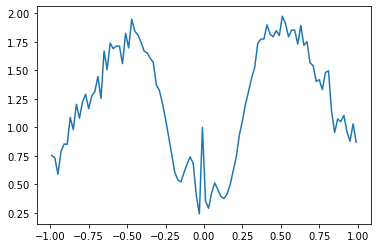

In [24]:
plt.plot(bin_centers,mc_norm/pilot_norm)

Text(0.5, 0, 'ty')

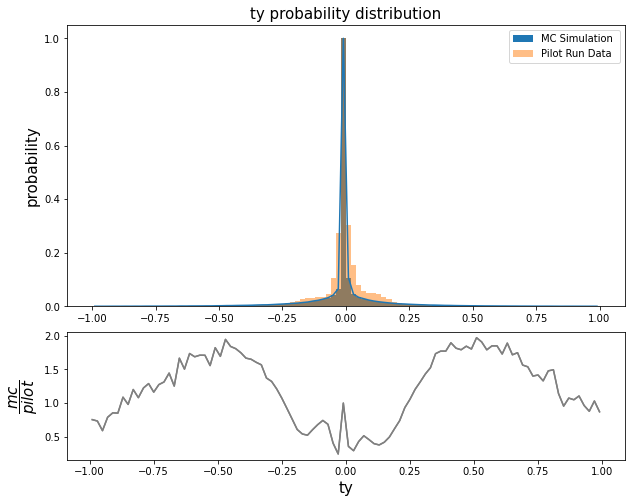

In [32]:
fig = plt.figure(figsize=(10,8))

# Creating the subplots with .add_gridspec()
ax = fig.add_gridspec(3,3)
ax1 = fig.add_subplot(ax[0:2, 0:3])
ax1.bar(bin_centers, mc_norm, width = bin_widths, align = 'center',label='MC Simulation ')
ax1.errorbar(bin_centers,mc_norm)
ax1.bar(bin_centers, pilot_norm, width = bin_widths,alpha=0.5, align = 'center',label='Pilot Run Data')
ax1.legend(fontsize=10)
ax1.set_title('ty probability distribution',size=15)
ax1.set_ylabel('probability',size=15)

ax2 = fig.add_subplot(ax[2, 0:3])
ax2.plot(bin_centers,mc_norm/pilot_norm,color='gray')
ax2.errorbar(bin_centers,mc_norm/pilot_norm,color='gray')
ax2.set_ylabel('$\dfrac{mc}{pilot}$',size=15)
ax2.set_xlabel('ty',size=15)
#ax2.set_title('[1:, 0:3]')

In [26]:
def tx_tx_compare(branch,N):
    # extract data
    tree_mc = tree_MC(N)[branch].array()
    tree_pilot = tree_pilot_data(N)[branch].array()
    
    # computing the bin properties (same for both distributions)
    num_bin = 100
    bin_lims = np.linspace(-1,1,num_bin+1)
    bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
    bin_widths = bin_lims[1:]-bin_lims[:-1]
    
    # normalize MC & data to 1
    mc, _ = np.histogram(np.array(tree_mc), bins=bin_lims)
    pilot, _ = np.histogram(np.array(tree_pilot), bins=bin_lims)
    mc_norm = mc/np.max(mc)
    pilot_norm = pilot/np.max(pilot)
    
    # make plots
    fig = plt.figure(figsize=(10,8))
    
    # mc & pilot data imposed in a single plot
    ax = fig.add_gridspec(3,3)
    ax1 = fig.add_subplot(ax[0:2, 0:3])
    ax1.bar(bin_centers, mc_norm, width = bin_widths, align = 'center',label='MC Simulation ')
    ax1.bar(bin_centers, pilot_norm, width = bin_widths,alpha=0.5, align = 'center',label='Pilot Run Data')
    ax1.legend(fontsize=10)
    ax1.set_title(str(branch) +' probability distribution (tree' + str(N) +')',size=15)
    ax1.set_ylabel('probability',size=15)
    
    # ratio of mc/pilot
    ax2 = fig.add_subplot(ax[2, 0:3])
    ax2.plot(bin_centers,mc_norm/pilot_norm,color='gray')
    ax2.set_ylabel('$\dfrac{mc}{pilot}$',size=10)
    ax2.set_xlabel(branch,size=15)
    
    plt.show()

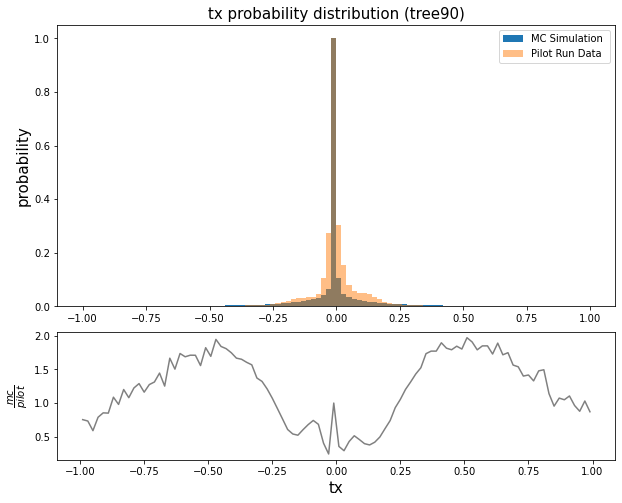

In [27]:
tx_tx_compare('tx',90)